# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
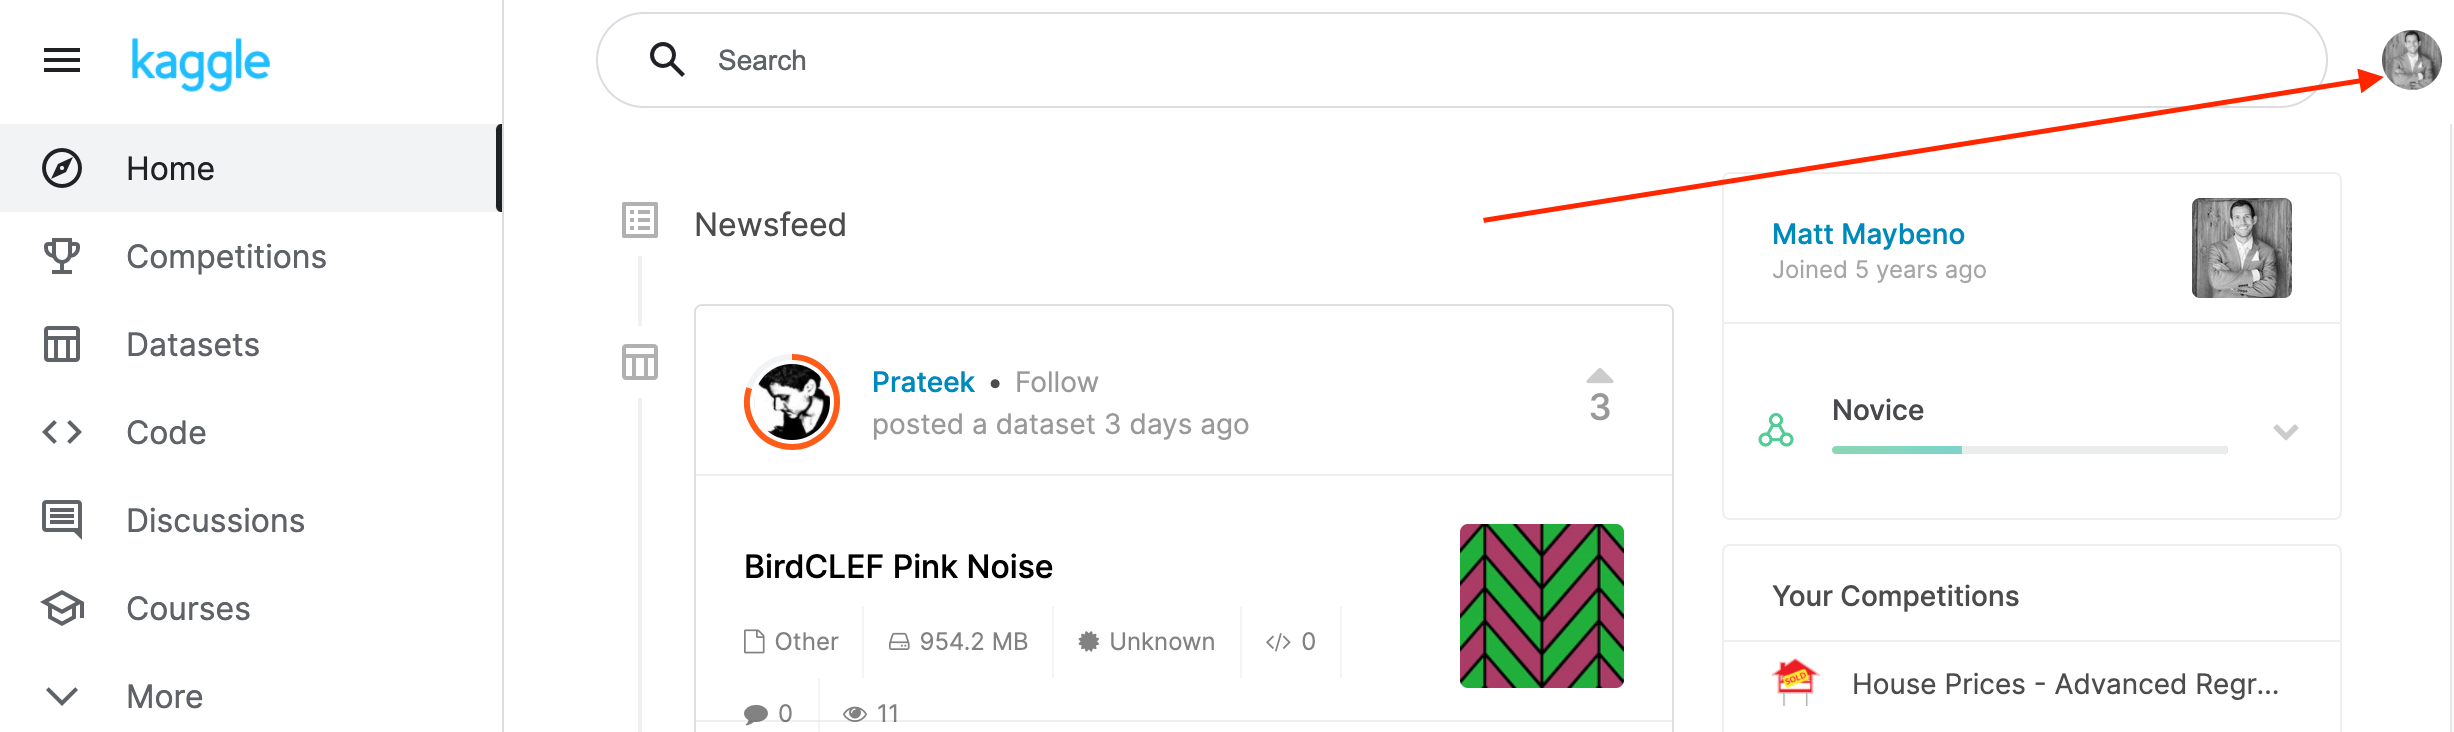
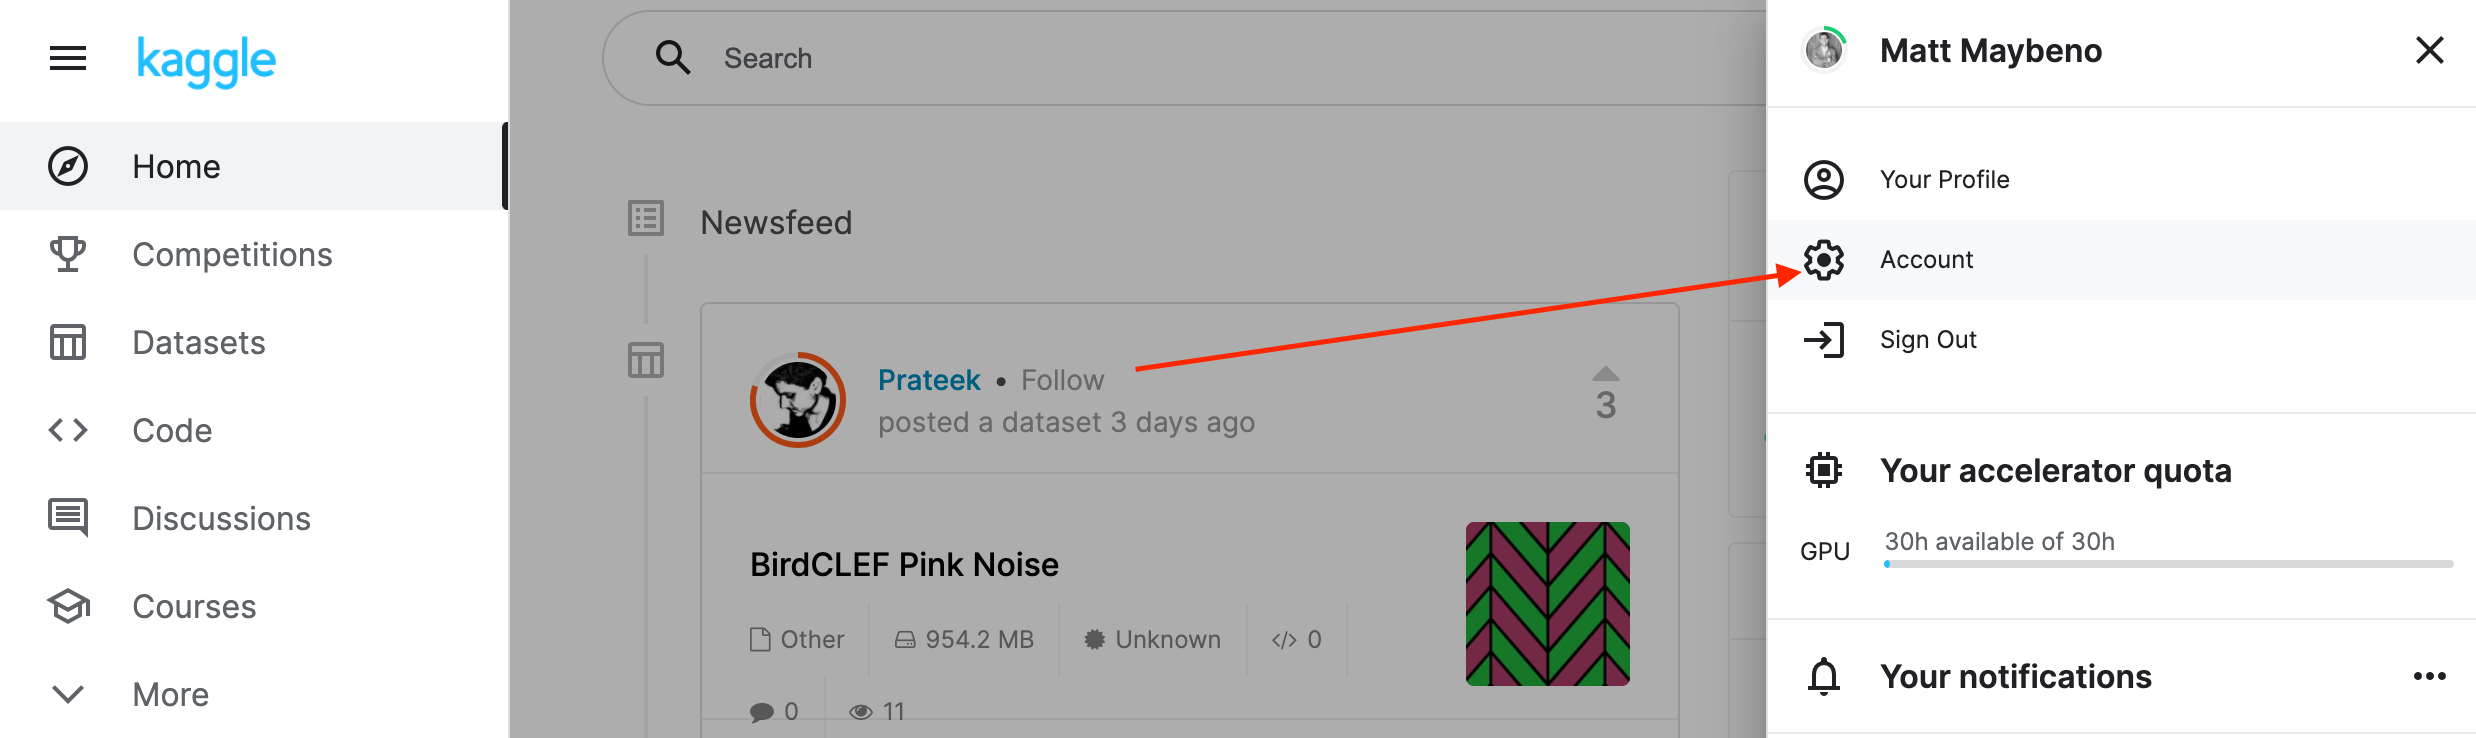
2. Scroll down to API and click Create New API Token.
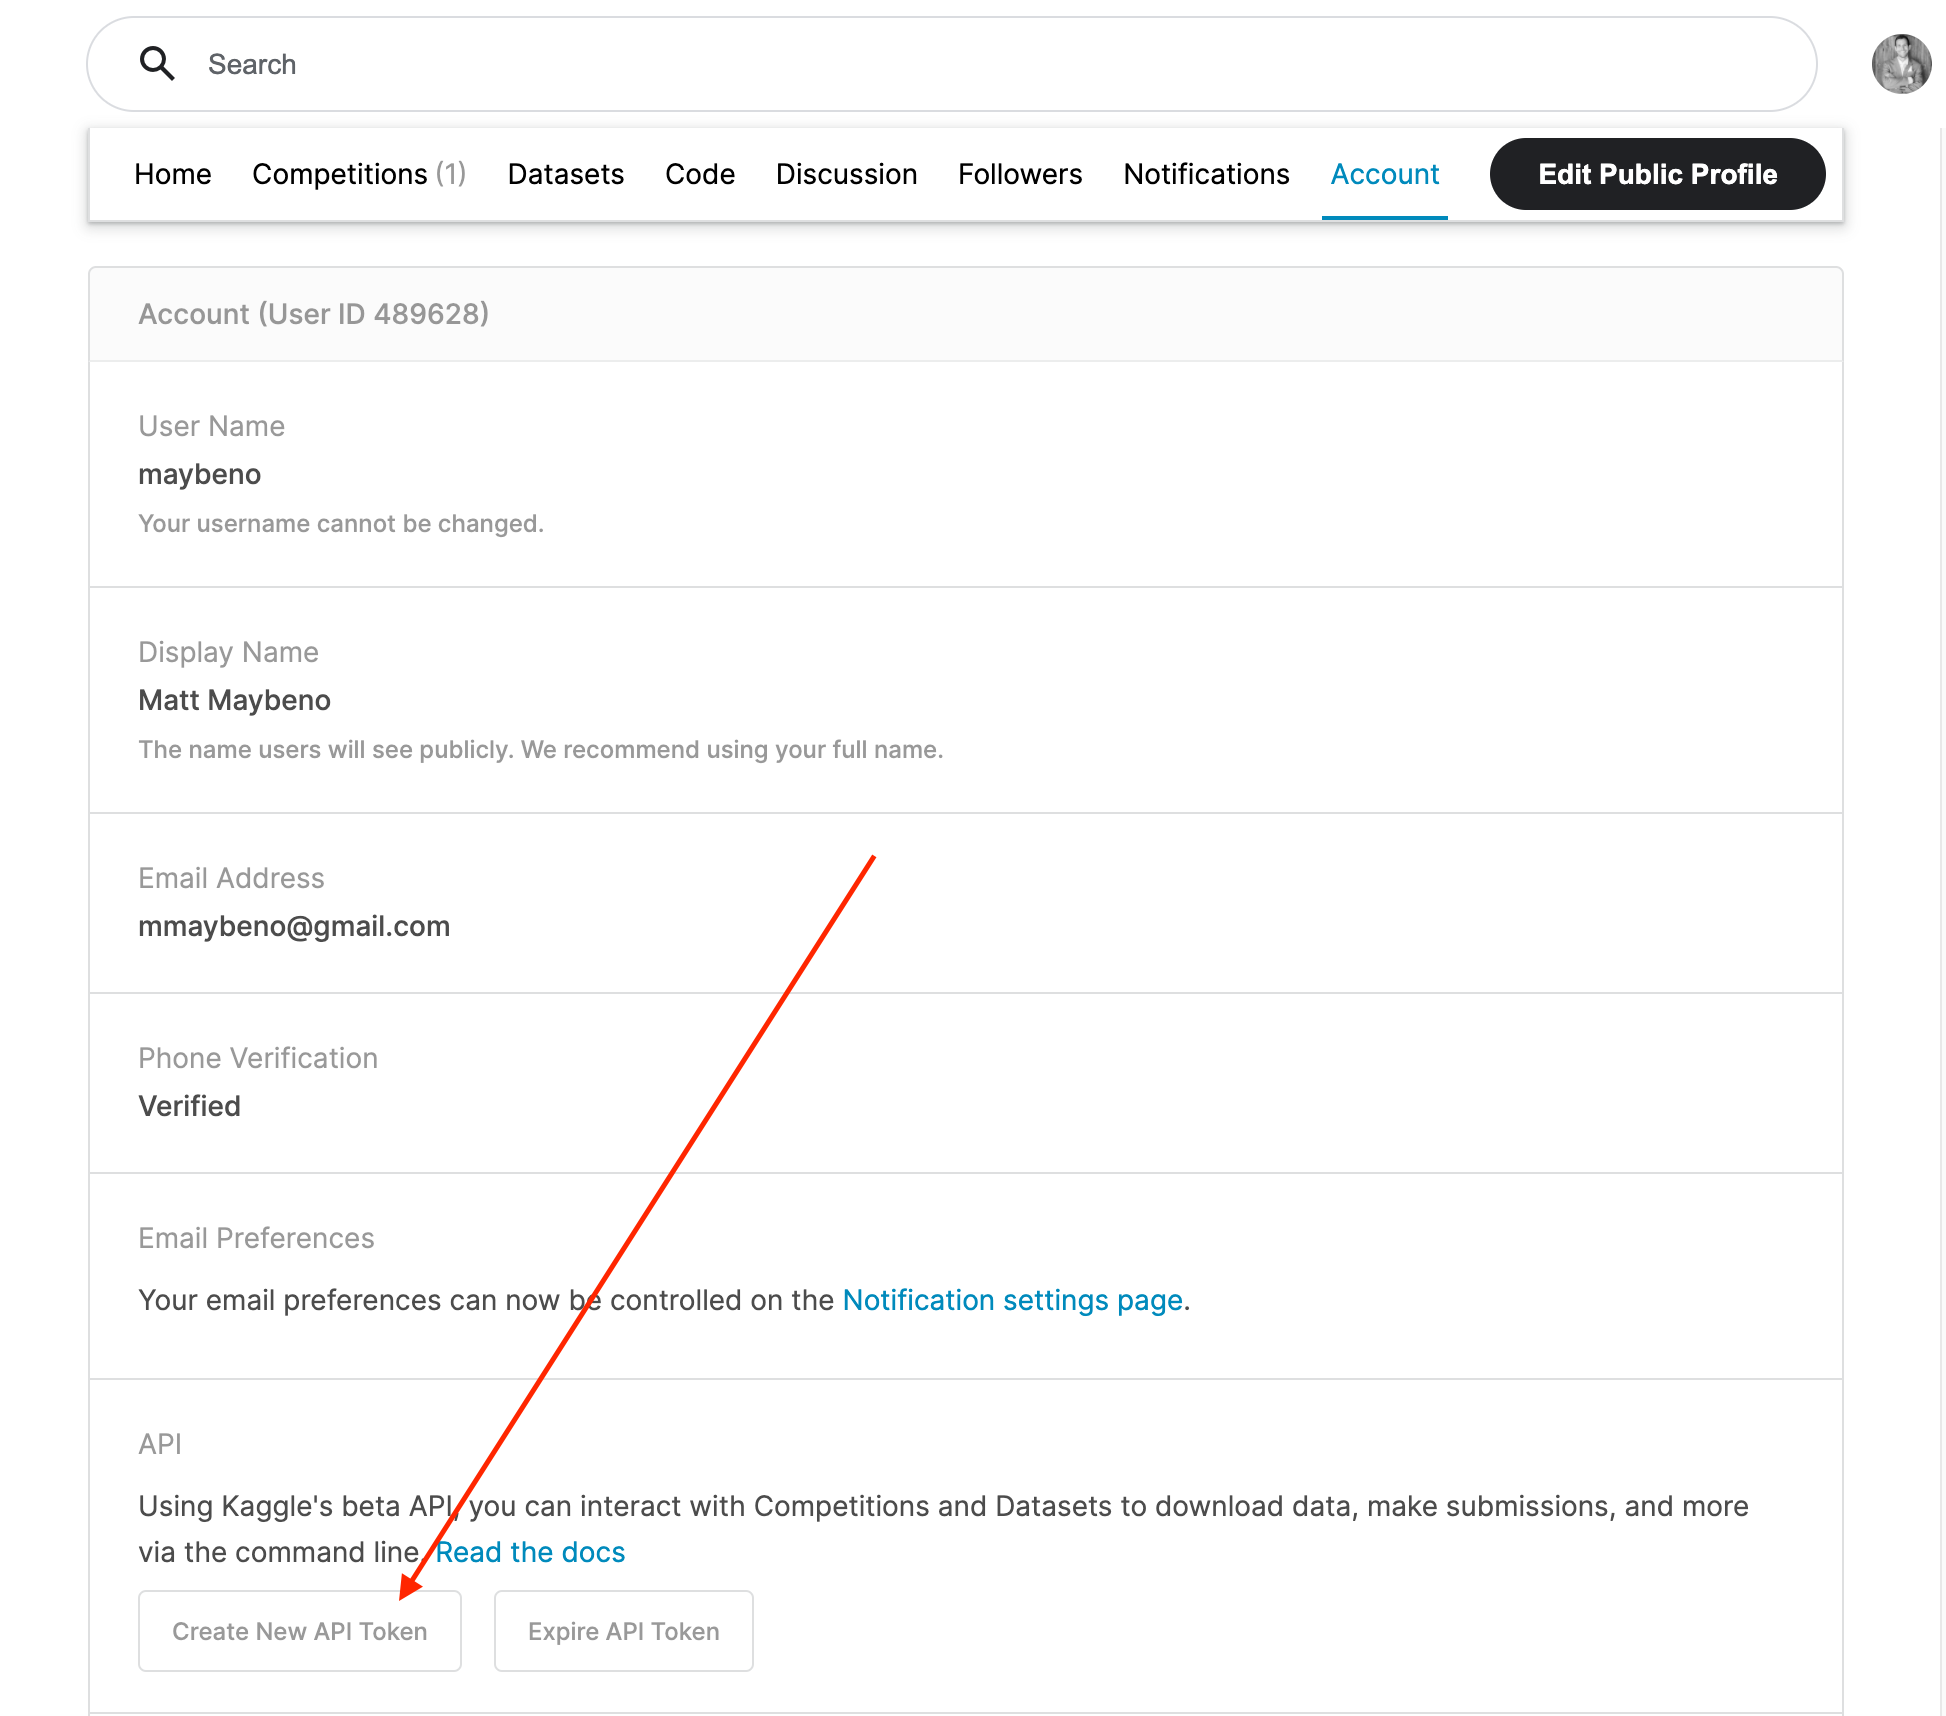
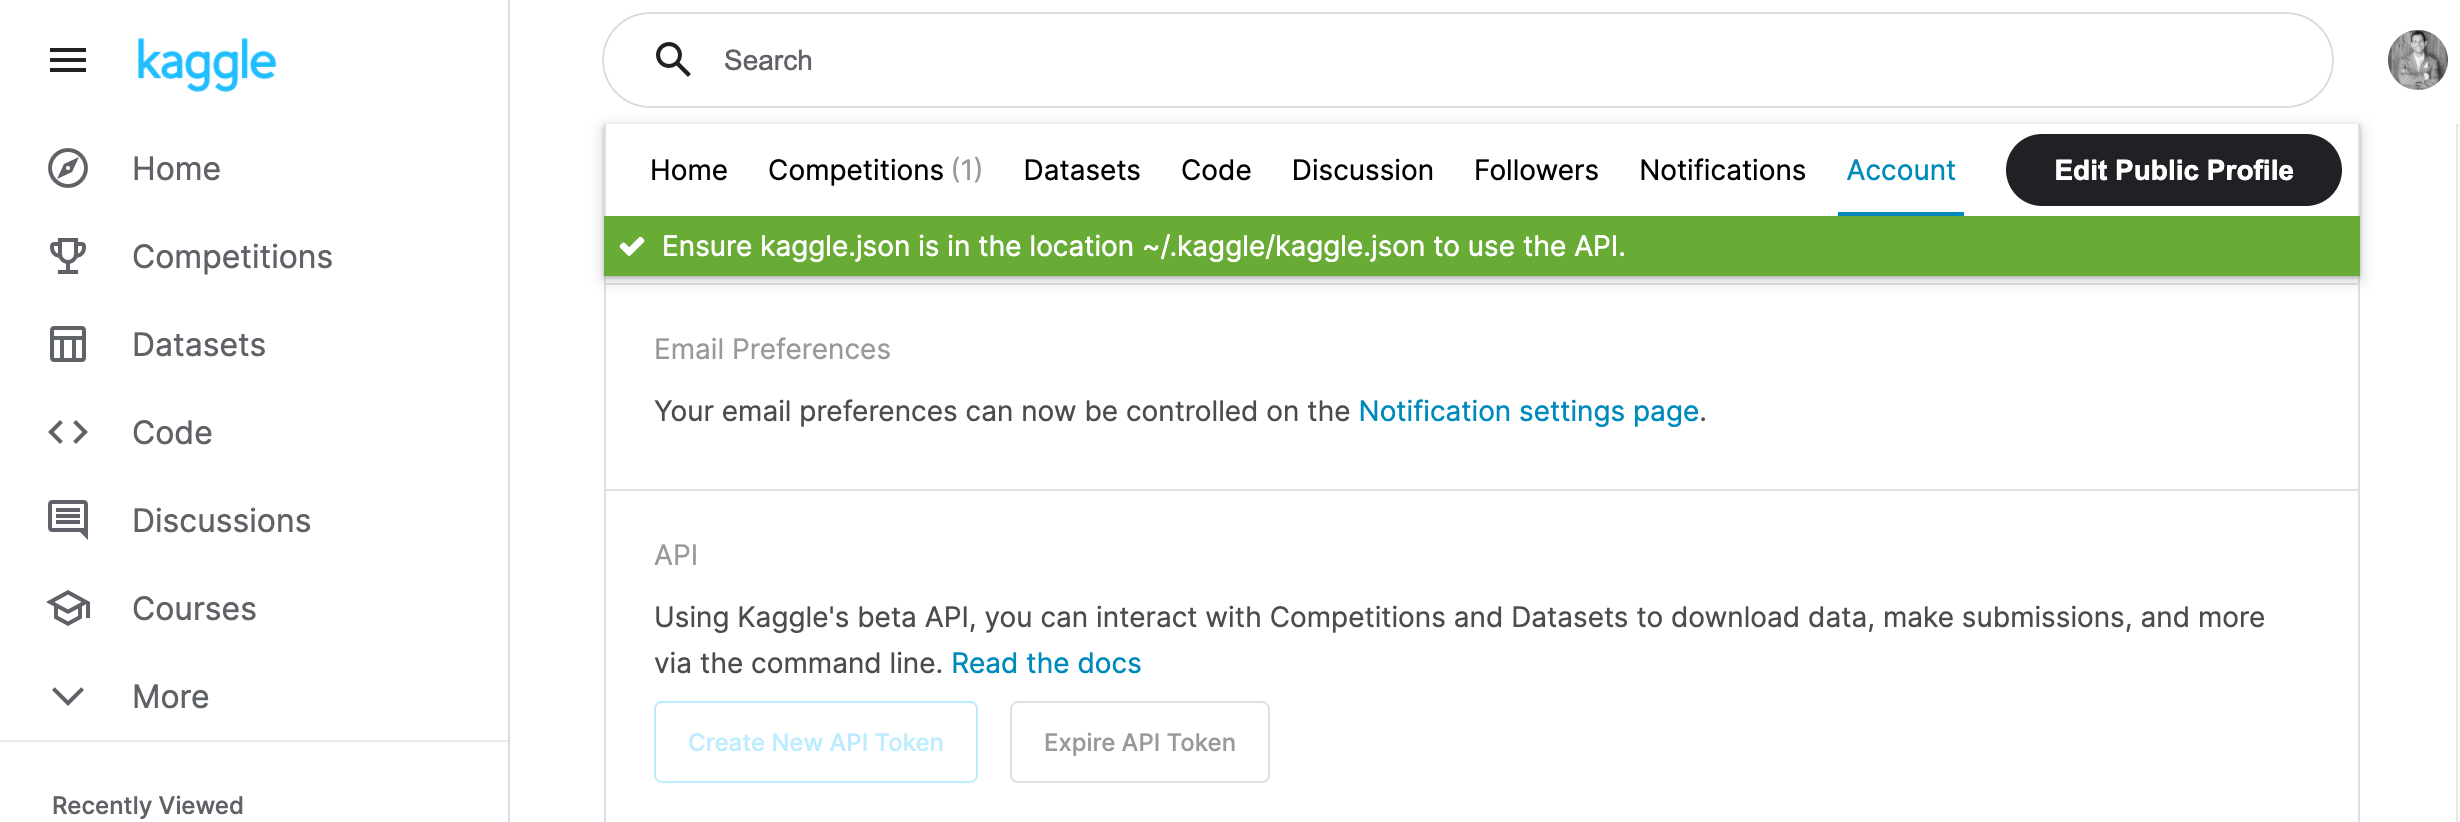
3. Open up `kaggle.json` and use the username and key.
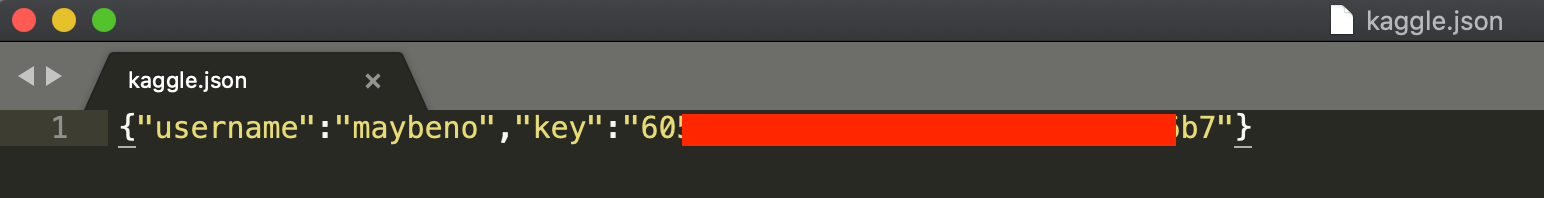

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.3.2-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
  Using cached setuptools-69.0.3-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-69.0.3-py3-none-any.whl (819 kB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "anush1"
kaggle_key = "f803d9e6450c5a262283bb0fcb39642e"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [5]:
pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 611.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.2-py3-none-any.whl size=111924 sha256=89e750fd1a7a0b0e9bec900a508dfe62cadca47d7c85ac9d1fee63a3ae50dc0e
  Stored in directory: /root/.cache/pip/wheels/d2/d5/04/2b44c91fe0e1a03f504a416a0424a4e63be890fb60413b2c77
Successfully built kaggle
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
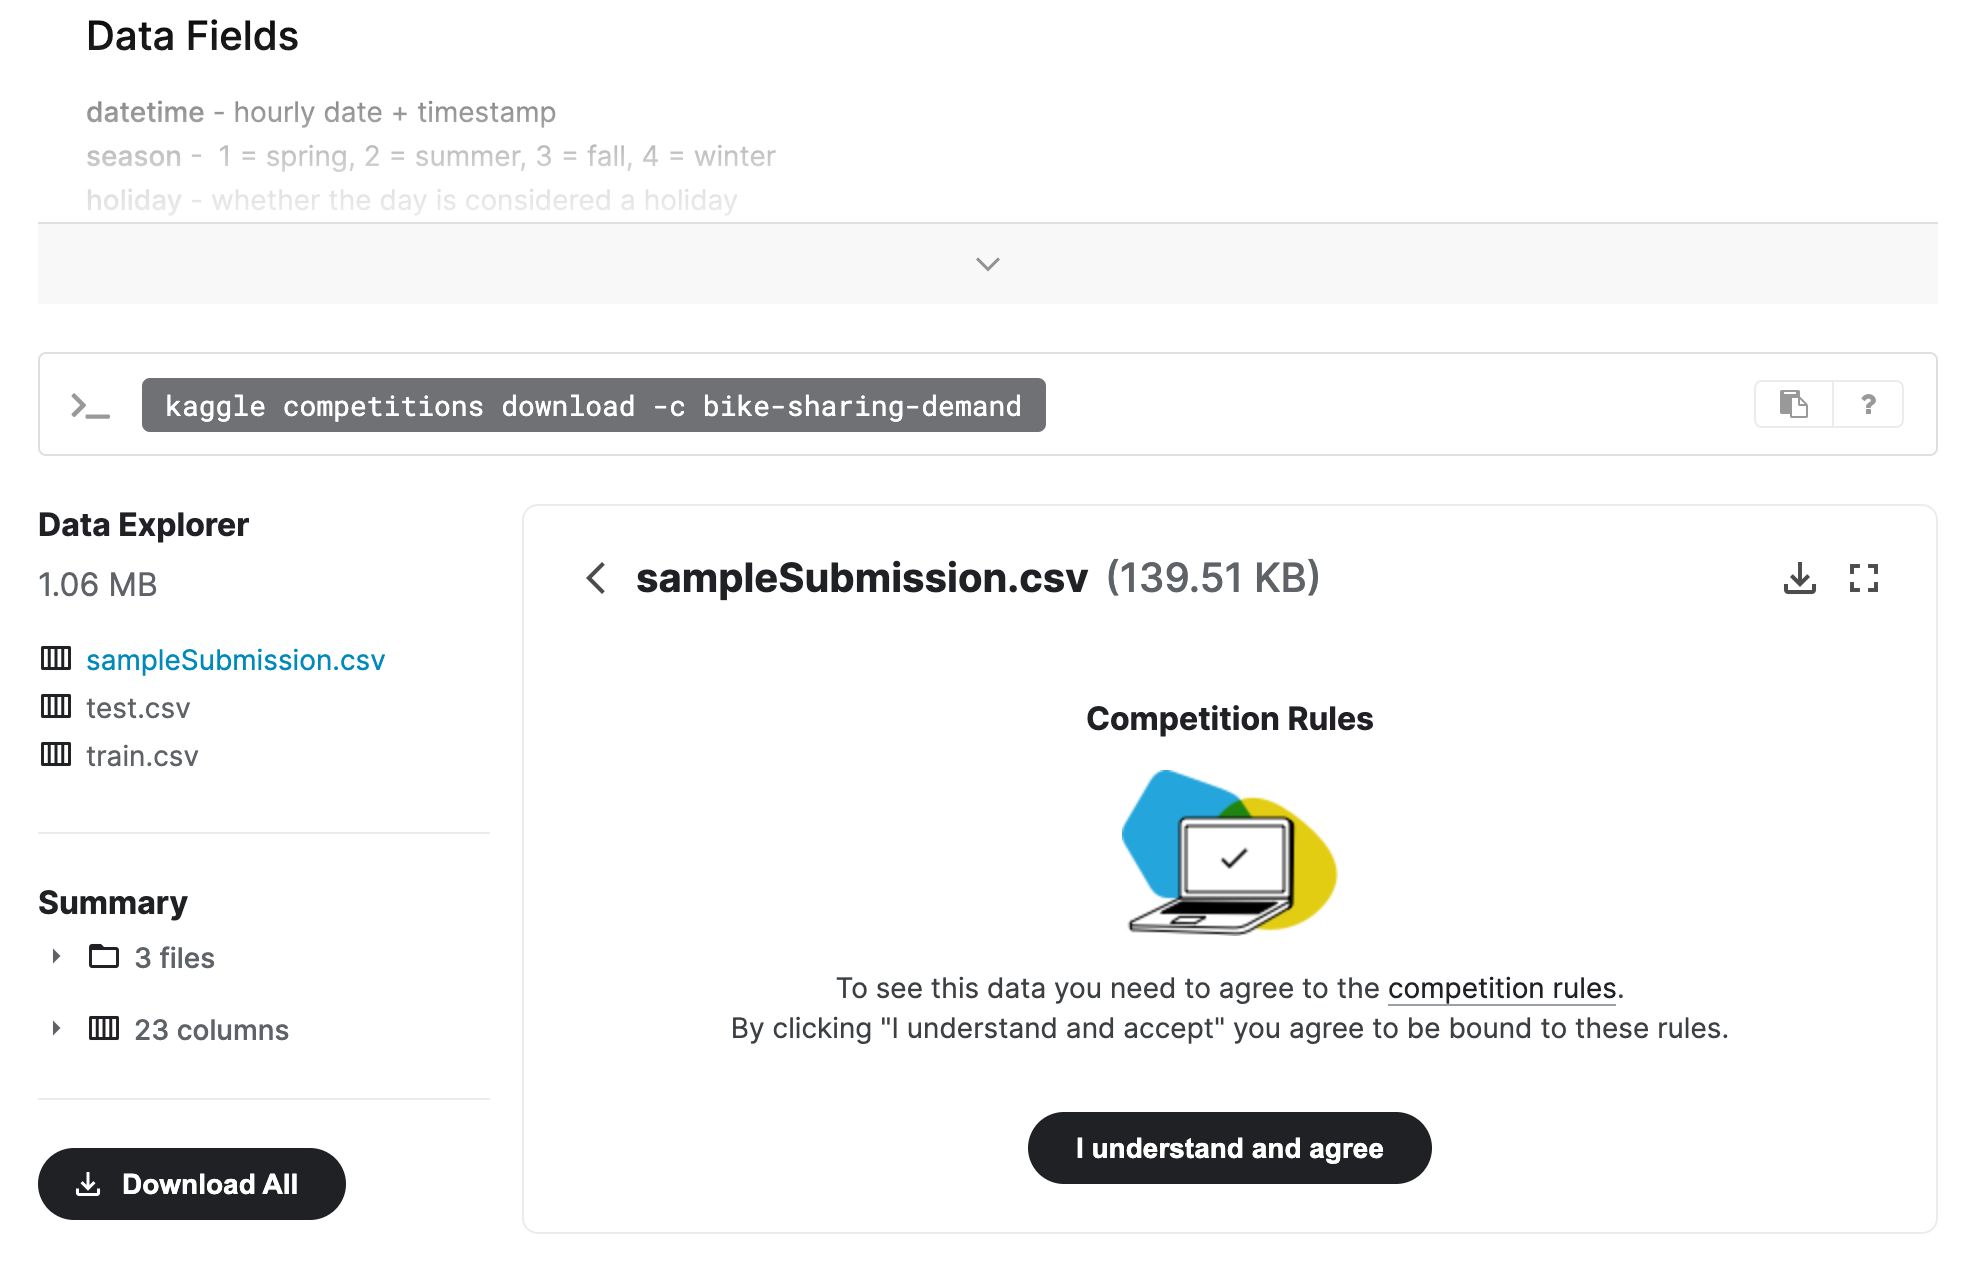

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv(r'train.csv')
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [9]:
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [12]:
train['datetime']=pd.to_datetime(train['datetime'])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [14]:
train.describe()

datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000   
50%        1.000000      1.000000     20.50000     24.240000     62.000000   
75%        1.000000      2.000000     26.24000     31.060000     77.000000   
max        1.000000      4.000000     41.00000     45.455000    100.000000   
std        0.466159      0.633839      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

In [15]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [16]:
train.describe()

datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000   
50%        1.000000      1.000000     20.50000     24.240000     62.000000   
75%        1.000000      2.000000     26.24000     31.060000     77.000000   
max        1.000000      4.000000     41.00000     45.455000    100.000000   
std        0.466159      0.633839      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [18]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv(r'test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [20]:
# Same thing as train and test dataset
submission = pd.read_csv(r'sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [21]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [22]:
predictor = TabularPredictor(label='count',learner_kwargs={'ignored_columns': ["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240110_181736"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240110_181736/ds_sub_fit/sub_fit_ho.
2024-01-10 18:17:37,215	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Beginning Aut

### Review AutoGluon's training run with ranking of models that did the best.

In [23]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -52.969367  root_mean_squared_error       2.682284  391.343196                0.000798           0.621836            3       True         10
1  RandomForestMSE_BAG_L2  -53.304556  root_mean_squared_error       2.622785  324.593293                0.667516          41.669643            2       True          8
2         CatBoost_BAG_L2  -55.217760  root_mean_squared_error       2.013970  349.051717                0.058700          66.128067            2       True          9
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.049261    0.049123                0.049261           0.049123            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.050114    0.659113         

/opt/conda/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.5543957956974,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'NeuralNetFastAI_BAG_L1': -139.41297889017017,
  'WeightedEnsemble_L2': -84.12506123181602,
  'RandomForestMSE_BAG_L2': -53.3045558464357,
  'CatBoost_BAG_L2': -55.2177604394261,
 

### Create predictions from test dataset

In [24]:
predictions = predictor.predict(test)
predictions.head()

0    23.889946
1    43.024620
2    46.281952
3    48.234787
4    50.917175
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [25]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.994377
std        90.118309
min         2.944816
25%        20.204197
50%        64.926102
75%       165.958344
max       364.331726
Name: count, dtype: float64

In [26]:
# How many negative values do we have?
predictions.lt(0).value_counts()

count
False    6493
Name: count, dtype: int64

In [27]:
# Set them to zero
predictions.iloc[predictions<0] = 0
predictions.lt(0).value_counts()

count
False    6493
Name: count, dtype: int64

### Set predictions to submission dataframe, save, and submit

In [28]:
submission["count"] = predictions

In [29]:
submission.head()

datetime      count
0  2011-01-20 00:00:00  23.889946
1  2011-01-20 01:00:00  43.024620
2  2011-01-20 02:00:00  46.281952
3  2011-01-20 03:00:00  48.234787
4  2011-01-20 04:00:00  50.917175

In [30]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6493 non-null   object 
 1   count     6493 non-null   float32
dtypes: float32(1), object(1)
memory usage: 76.2+ KB


In [31]:

submission.to_csv("submission.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 352kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [33]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-01-10 18:28:47  first raw submission               complete  1.79314      1.79314       
submission.csv               2024-01-10 05:38:34  first raw submission               complete  1.82197      1.82197       
submission_new_features.csv  2024-01-10 04:17:57  new features                       complete  0.48299      0.48299       
submission.csv               2024-01-10 04:06:00  first raw submission               complete  1.78945      1.78945       


#### Initial score of `1.79314`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

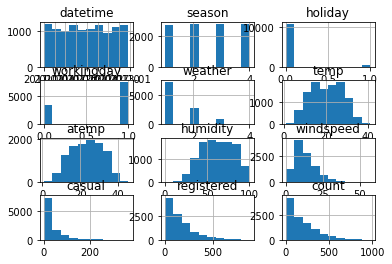

In [35]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist();

In [36]:
# create a new feature
train['date']=train['datetime'].dt.day
train['month']=train['datetime'].dt.month
train['year']=train['datetime'].dt.year
train['hour']=train['datetime'].dt.hour

train.drop(["datetime"], axis=1, inplace=True)

test['datetime']=pd.to_datetime(test['datetime'])
test['date']=test['datetime'].dt.day
test['month']=test['datetime'].dt.month
test['year']=test['datetime'].dt.year
test['hour']=test['datetime'].dt.hour

test.drop(["datetime"], axis=1, inplace=True)

train.head()
test.head()

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   date  month  year  hour  
0    20      1  2011     0  
1    20      1  2011     1  
2    20      1  2011     2  
3    20      1  2011     3  
4    20      1  2011     4

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [37]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [38]:
# View are new feature
train.head()

season  holiday  workingday weather  temp   atemp  humidity  windspeed  \
0      1        0           0       1  9.84  14.395        81        0.0   
1      1        0           0       1  9.02  13.635        80        0.0   
2      1        0           0       1  9.02  13.635        80        0.0   
3      1        0           0       1  9.84  14.395        75        0.0   
4      1        0           0       1  9.84  14.395        75        0.0   

   casual  registered  count  date  month  year  hour  
0       3          13     16     1      1  2011     0  
1       8          32     40     1      1  2011     1  
2       5          27     32     1      1  2011     2  
3       3          10     13     1      1  2011     3  
4       0           1      1     1      1  2011     4

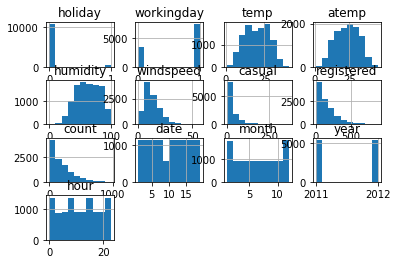

In [40]:
# View histogram of all features again now with the hour feature
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [41]:
predictor_new_features = TabularPredictor(label='count',learner_kwargs={'ignored_columns': ["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240110_182955"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240110_182955/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 161 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 439 seconds.
Starting full fit now with num_stack_leve

In [42]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -37.468181  root_mean_squared_error       3.822078  360.304628                0.002625           0.777646            3       True         11
1      WeightedEnsemble_L2  -37.742487  root_mean_squared_error       1.594466  244.534038                0.000836           0.484102            2       True          7
2          CatBoost_BAG_L2  -37.949099  root_mean_squared_error       2.576520  349.062602                0.082123          56.306641            2       True          9
3     ExtraTreesMSE_BAG_L2  -38.063019  root_mean_squared_error       3.737330  303.220341                1.242933          10.464381            2       True         10
4          CatBoost_BAG_L1  -38.401461  root_mean_squared_error       0.306315  222.773617   

/opt/conda/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeighborsDist_BAG_L1': -119.36560130583281,
  'RandomForestMSE_BAG_L1': -42.14081220632609,
  'CatBoost_BAG_L1': -38.401461289400515,
  'ExtraTreesMSE_BAG_L1': -41.40759331319943,
  'NeuralNetFastAI_BAG_L1': -103.80152770679322,
  'WeightedEnsemble_L2': -37.74248722223413,
  'RandomForestMSE_BAG_L2': -39.005

In [43]:

predictions_new_features = predictor_new_features.predict(test)

In [44]:
predictions_new_features.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6493 entries, 0 to 6492
Series name: count
Non-Null Count  Dtype  
--------------  -----  
6493 non-null   float32
dtypes: float32(1)
memory usage: 25.5 KB


In [45]:
predictions_new_features.lt(0).value_counts()

count
False    6464
True       29
Name: count, dtype: int64

In [46]:
# Remember to set all negative values to zero
predictions_new_features [predictions_new_features<0] = 0

In [47]:

predictions_new_features.lt(0).value_counts()

count
False    6493
Name: count, dtype: int64

In [48]:
# Same submitting predictions
submission_new_features = pd.read_csv('./sampleSubmission.csv')
submission_new_features['datetime']=pd.to_datetime(submission_new_features['datetime'])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [49]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 372kB/s]
Successfully submitted to Bike Sharing Demand

In [50]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-01-10 18:41:15  new features                       complete  0.49104      0.49104       
submission.csv               2024-01-10 18:28:47  first raw submission               complete  1.79314      1.79314       
submission.csv               2024-01-10 05:38:34  first raw submission               complete  1.82197      1.82197       
submission_new_features.csv  2024-01-10 04:17:57  new features                       complete  0.48299      0.48299       


#### New Score of `0.49104`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [53]:

eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]  
train_data = train                          
time_limit = 600                            
presets = "optimize_for_deployment"    

In [54]:
import autogluon.core as ag
## From autogluon documentation

nn_options = {'num_epochs': 5}

gbm_options = [{'extra_trees': True, 
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

Fitted model: NeuralNetTorch/60ca57cb ...
	-123.74	 = Validation score   (-root_mean_squared_error)
	7.22s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/11f983a8 ...
	-147.8989	 = Validation score   (-root_mean_squared_error)
	8.79s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/05e1a041 ...
	-128.8332	 = Validation score   (-root_mean_squared_error)
	16.62s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: NeuralNetTorch/03dc32b9 ...
	-266.525	 = Validation score   (-root_mean_squared_error)
	9.94s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/0a52a65d ...
	-139.3552	 = Validation score   (-root_mean_squared_error)
	3.61s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/882b0b03 ...
	-114.8716	 = Validation score   (-root_mean_squared_error)
	5.24s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: NeuralNetTorch/d1298a2b ...
	

In [55]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -75.800441  root_mean_squared_error       0.137505  21.973836                0.000743           0.323611            2       True          4
1  NeuralNetTorch/64ffff03 -78.484677  root_mean_squared_error       0.058530  10.121572                0.058530          10.121572            1       True          2
2  NeuralNetTorch/c6df02e1 -81.465275  root_mean_squared_error       0.035659   5.403237                0.035659           5.403237            1       True          3
3  NeuralNetTorch/927ceab2 -84.812339  root_mean_squared_error       0.042574   6.125416                0.042574           6.125416            1       True          1
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'TabularNeuralNetTorchMo

/opt/conda/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetTorch/927ceab2': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/64ffff03': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/c6df02e1': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch/927ceab2': -84.81233895102885,
  'NeuralNetTorch/64ffff03': -78.48467696457512,
  'NeuralNetTorch/c6df02e1': -81.46527527916771,
  'WeightedEnsemble_L2': -75.80044067915752},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetTorch/927ceab2': ['NeuralNetTorch', '927ceab2'],
  'NeuralNetTorch/64ffff03': ['NeuralNetTorch', '64ffff03'],
  'NeuralNetTorch/c6df02e1': ['NeuralNetTorch', 'c6df02e1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'NeuralNetTorch/927ceab2': 6.125416278839111,
  'NeuralNetTorch/64ffff03': 10.121572017669678,
  'NeuralNetTorch/c6df02e1': 5.403236627578735,
  'WeightedEnsemble_L2': 0.3236112594604492},
 'model_pred_times': {'NeuralNetTorch/927ceab2

In [56]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)

In [57]:
predictions_new_hpo [predictions_new_hpo<0] = 0

In [58]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('./sampleSubmission.csv')
submission_new_hpo['datetime']=pd.to_datetime(submission_new_hpo['datetime'])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [59]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 276kB/s]
Successfully submitted to Bike Sharing Demand

In [60]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-01-10 18:46:22  new features with hyperparameters  complete  0.86673      0.86673       
submission_new_features.csv  2024-01-10 18:41:15  new features                       complete  0.49104      0.49104       
submission.csv               2024-01-10 18:28:47  first raw submission               complete  1.79314      1.79314       
submission.csv               2024-01-10 05:38:34  first raw submission               complete  1.82197      1.82197       


#### New Score of `0.86673`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

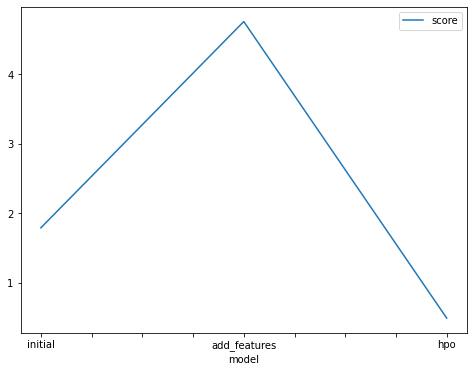

In [148]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.79314, 0.49104, 0.86673]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

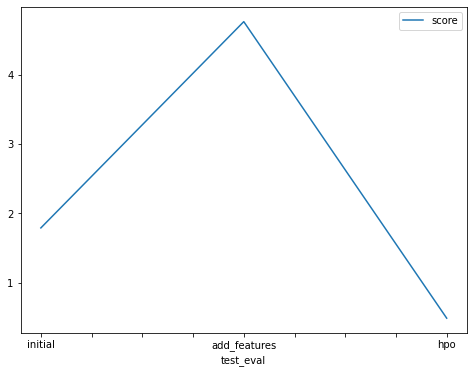

In [149]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79314, 0.49104, 0.86673]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [61]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo2)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.84484, 0.44798, 0.49440]
})

model                                    hpo1  \
0                    initial                       prescribed_values   
1               add_features                       prescribed_values   
2  hpo (top-hpo-model: hpo2)  Tree-Based Models: (GBM, XT, XGB & RF)   

                hpo2                                       hpo3    score  
0  prescribed_values  presets: 'high quality' (auto_stack=True)  1.84484  
1  prescribed_values  presets: 'high quality' (auto_stack=True)  0.44798  
2                KNN          presets: 'optimize_for_deployment  0.49440